In [24]:
import pandas as pd

In [25]:
life_ex = pd.read_csv('data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_5358385.csv', skiprows=4)
health_ex = pd.read_csv('data/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_5359940.csv', skiprows=4)

In [26]:
life_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.636,75.601,75.683,75.617,75.903,76.072,76.248,75.723,NaN,NaN


In [27]:
health_ex.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Only keep columns for life_ex: Country Name, 2019
life_ex = life_ex[['Country Name', '2019']]
life_ex

,Country Name,2019
0,Aruba,76.248000
1,Africa Eastern and Southern,63.755674
2,Afghanistan,63.565000
3,Africa Western and Central,57.555796
4,Angola,62.448000
...,...,...
261,Kosovo,79.022000
262,"Yemen, Rep.",65.092000
263,South Africa,66.175000
264,Zambia,62.793000


In [29]:
# Only keep columns for life_ex: Country Name, 2019
health_ex = health_ex[['Country Name', '2019']]
health_ex

,Country Name,2019
0,Aruba,NaN
1,Africa Eastern and Southern,91.078351
2,Afghanistan,65.806030
3,Africa Western and Central,61.362172
4,Angola,71.326004
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",NaN
263,South Africa,546.688416
264,Zambia,69.324379


In [30]:
# add new column in health_ex with life expectancy
health_ex['Life Expectancy at Birth (total years)'] = life_ex['2019']
health_ex

,Country Name,2019,Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [31]:
# rename 2019 column to Health Expenditure per Capita (current US$)
health_ex.rename(columns={'2019': 'Health Expenditure per Capita (current US$)'}, inplace=True)
health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,Aruba,NaN,76.248000
1,Africa Eastern and Southern,91.078351,63.755674
2,Afghanistan,65.806030,63.565000
3,Africa Western and Central,61.362172,57.555796
4,Angola,71.326004,62.448000
...,...,...,...
261,Kosovo,NaN,79.022000
262,"Yemen, Rep.",NaN,65.092000
263,South Africa,546.688416,66.175000
264,Zambia,69.324379,62.793000


In [32]:
# Drop nans
health_ex.dropna(inplace=True)



# sort by Health Expenditure per Capita (current US$)
health_ex.sort_values(by='Health Expenditure per Capita (current US$)', ascending = False, inplace=True)

# reset index
health_ex.reset_index(drop=True, inplace=True)

health_ex

,Country Name,Health Expenditure per Capita (current US$),Life Expectancy at Birth (total years)
0,United States,10921.012695,78.787805
1,North America,10317.570019,79.123365
2,Switzerland,9666.337891,83.904878
3,Norway,8007.397949,82.958537
4,Iceland,6274.959473,83.163415
...,...,...,...
221,Eritrea,25.267935,67.300000
222,South Sudan,22.638187,55.912000
223,"Congo, Dem. Rep.",20.570732,60.276000
224,Burundi,20.567541,62.351000


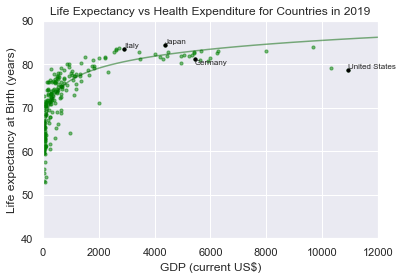

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.linear_model import LinearRegression
sns.set_theme()


# conditional plot for the year 2020
df_2020 = health_ex
plt.scatter(data=df_2020, x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='green', marker='o', s=10, alpha=0.5, label='2019')
# fit a linear model between log GDP and life expectancy
reg = LinearRegression().fit(np.log(df_2020['Health Expenditure per Capita (current US$)']).values.reshape(-1, 1), df_2020['Life Expectancy at Birth (total years)'].values.reshape(-1, 1))
# plot the linear model
x = np.linspace(start=4, stop=12, num=100)
y = reg.coef_[0][0] * x + reg.intercept_[0]
plt.plot(np.exp(x), y, alpha=0.5, c='darkgreen')

# annotate Japan with country name, make point bigger

for row in df_2020.index:
    if df_2020.loc[row, 'Country Name'] in ['Japan', 'Germany', 'Italy', 'United States']:
        plt.scatter(data=df_2020.loc[row, :], x='Health Expenditure per Capita (current US$)', y='Life Expectancy at Birth (total years)', c='black', marker='o', s=10, alpha=1)
        plt.text(x=df_2020.loc[row, 'Health Expenditure per Capita (current US$)'] + 0.2, y=df_2020.loc[row, 'Life Expectancy at Birth (total years)'] + 0.3 - 1.6*(df_2020.loc[row, 'Country Name'] == 'Germany'), s=df_2020.loc[row, 'Country Name'], fontsize=8)

    




# plt.legend(title='Year')  
plt.title('Life Expectancy vs Health Expenditure for Countries in 2019')
# plt.xscale('log')
# make y axis go from 0 to 100
plt.ylim(40, 90)
plt.xlim(0, 12000)
plt.xlabel('GDP (current US$)')
plt.ylabel('Life expectancy at Birth (years)')
plt.show()

In [75]:
physical_activity = pd.read_csv('data/physical_ac.csv')
# only include data for countries USA, Japan, Germany, Italy

physical_activity = physical_activity[physical_activity['Unnamed: 0'].isin(['United States of America', 'Japan', 'Germany', 'Italy'])]

In [76]:
physical_activity

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%),Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%).1,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%).2,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%).1,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%).2
67,Germany,2016,18+ years,42.2 [35.5-49.2],40.2 [34.0-46.7],44.1 [36.9-51.6],45.8 [39.0-52.8],43.5 [37.2-50.1],48.0 [40.7-55.4]
85,Italy,2016,18+ years,41.4 [34.3-48.8],36.2 [29.9-42.9],46.2 [38.4-54.2],44.8 [37.6-52.2],39.3 [32.8-46.2],49.9 [42.1-57.8]
87,Japan,2016,18+ years,35.5 [20.5-53.8],33.8 [20.1-50.9],37.0 [21.0-56.5],38.1 [22.5-56.5],36.2 [21.8-53.5],39.8 [23.1-59.2]
186,United States of America,2016,18+ years,40.0 [33.0-47.3],31.7 [25.8-38.3],48.0 [40.1-56.1],42.5 [35.4-49.9],33.7 [27.6-40.5],51.0 [43.0-59.0]


In [77]:
# Only include columns Unnamed: 0 and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
physical_activity = physical_activity[['Unnamed: 0', 'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)']]
physical_activity


,Unnamed: 0,Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
67,Germany,42.2 [35.5-49.2]
85,Italy,41.4 [34.3-48.8]
87,Japan,35.5 [20.5-53.8]
186,United States of America,40.0 [33.0-47.3]


In [78]:
# rename columns to Country Name
physical_activity.rename(columns={'Unnamed: 0': 'Country Name', 'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)': 'Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'}, inplace=True)

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [79]:
physical_activity

,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2 [35.5-49.2]
85,Italy,41.4 [34.3-48.8]
87,Japan,35.5 [20.5-53.8]
186,United States of America,40.0 [33.0-47.3]


In [80]:
# In column Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) remove the 12 last characters
physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].str[:-12]
physical_activity


<ipython-input-80-ce4f49407b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].str[:-12]


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2
85,Italy,41.4
87,Japan,35.5
186,United States of America,40.0


In [81]:
# In column Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) convert to float
physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].astype(float)
physical_activity

<ipython-input-81-c74fc4aa3fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'] = physical_activity['Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)'].astype(float)


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
67,Germany,42.2
85,Italy,41.4
87,Japan,35.5
186,United States of America,40.0


In [82]:
# sort by Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
physical_activity.sort_values(by='Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)', ascending = False, inplace=True)

# reset index
physical_activity.reset_index(drop=True, inplace=True)

# Rename united states of america to United States
physical_activity['Country Name'] = physical_activity['Country Name'].str.replace('United States of America', 'United States')

physical_activity


/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-82-6773faac0086>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_activity['Country Name'] = physical_activity['Country Name'].str.replace('United States of America', 'United States')


,Country Name,Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)
0,Germany,42.2
1,Italy,41.4
2,United States,40.0
3,Japan,35.5


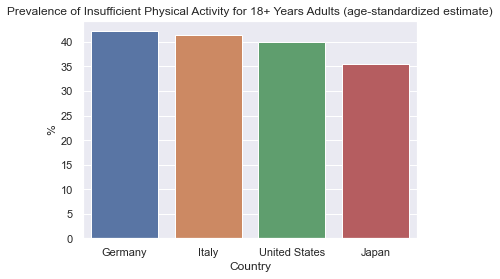

In [84]:
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=physical_activity, x='Country Name', y='Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)', palette="Blues_r)
plt.title('Prevalence of Insufficient Physical Activity for 18+ Years Adults (age-standardized estimate)')
plt.ylabel('%') 
plt.xlabel('Country')
plt.show()



In [97]:
sui = pd.read_csv('data/sui.csv')

# Only keep the first three columns 
sui = sui.iloc[:, :3]

# drop firs row
sui.drop(0, inplace=True)

sui['Age-standardized suicide rates (per 100 000 population)'] = sui['Age-standardized suicide rates (per 100 000 population)'].str[:4]

sui['Age-standardized suicide rates (per 100 000 population)'] = sui['Age-standardized suicide rates (per 100 000 population)'].astype(float)

sui = sui[sui['Unnamed: 1'] == 'Both sexes']

sui = sui[['Unnamed: 0', 'Age-standardized suicide rates (per 100 000 population)']]

# Only include countries 

sui = sui[sui['Unnamed: 0'].isin(['United States of America', 'Japan', 'Germany', 'Italy'])]

# sort by Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)
sui.sort_values(by='Age-standardized suicide rates (per 100 000 population)', ascending = False, inplace=True)

# reset index
sui.reset_index(drop=True, inplace=True)

# Rename united states of america to United States
sui['Unnamed: 0'] = sui['Unnamed: 0'].str.replace('United States of America', 'United States')


sui

,Unnamed: 0,Age-standardized suicide rates (per 100 000 population)
0,United States,14.5
1,Japan,12.2
2,Germany,8.3
3,Italy,4.3


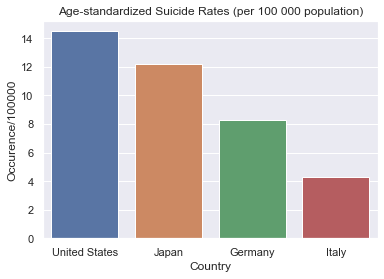

In [101]:
# Make bar plot with countries on x axis and Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%) on y axis in sns theme
sns.barplot(data=sui, x='Unnamed: 0', y='Age-standardized suicide rates (per 100 000 population)', palette="Blues_r)
plt.title('Age-standardized Suicide Rates (per 100 000 population)')
plt.ylabel('Occurence/100000') 
plt.xlabel('Country')
plt.show()